# 1 - Introduction

This notebook train four different neural network models. They are all pretty similar.

## 1.1 Load Packages and Global Variables

In [1]:
%matplotlib inline
import os
import numpy as np
import nltk
from sklearn.externals import joblib
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
PROJECT_DIR = os.path.join(os.getcwd(), os.pardir)
os.chdir(PROJECT_DIR)

In [3]:
import src.neural_networks as nn

In [4]:
from importlib import reload
nn = reload(nn)

## 1.2- Load the Data

Load the train and validation neural network data sets if they are present, otherwise raise an exception.

In [5]:
#Load sequnces
try:
    train = joblib.load('data/processed/train_nn.pkl')
    valid = joblib.load('data/processed/valid_nn.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [6]:
#Load embedding matrix of 50 dimensions
try:
    embedding_matrix50 = joblib.load('data/interim/embeddings50.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [7]:
#Load embedding matrix of 300 dimensions
try:
    embedding_matrix300 = joblib.load('data/interim/embeddings300.pkl')
except FileNotFoundError:
    #need to run earlier notebook if files not present
    raise Exception("Files not found. Run Notebook 4.1")

In [8]:
#these arguments will be the same when training both models
run_args = {"train":(train["seqs"],train["labels"]),
            "valid":(valid["seqs"],valid["labels"]),
            "monitor":"val_acc"}

# 2 - Train 50d model with fixed embeddings

In [9]:
#LSTM, average final
model50_fixed = nn.create_model(embedding_matrix=embedding_matrix50, n_hidden=150, train_embed=False)
model50_fixed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           1369800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 50)           0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 50)           0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 50)           0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               120600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [10]:
#output model as svg plot
plot_model(model50_fixed, to_file='reports/figures/nn_50d.svg', show_shapes =True)

In [11]:
%%time
#now train
history50_fixed = nn.run_model(model=model50_fixed, out_path="models/nn_50d_fixed.hdf5", **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
171945/171945 [==============================] - 136s 789us/step - loss: 0.6730 - acc: 0.5753 - val_loss: 0.6593 - val_acc: 0.5994
Epoch 2/1000
171945/171945 [==============================] - 90s 524us/step - loss: 0.6640 - acc: 0.5932 - val_loss: 0.6558 - val_acc: 0.6034
Epoch 3/1000
171945/171945 [==============================] - 90s 524us/step - loss: 0.6605 - acc: 0.5979 - val_loss: 0.6558 - val_acc: 0.6013
Epoch 4/1000
171945/171945 [==============================] - 91s 532us/step - loss: 0.6590 - acc: 0.5964 - val_loss: 0.6503 - val_acc: 0.6093
Epoch 5/1000
171945/171945 [==============================] - 91s 529us/step - loss: 0.6547 - acc: 0.6037 - val_loss: 0.6486 - val_acc: 0.6104
Epoch 6/1000
171945/171945 [==============================] - 91s 529us/step - loss: 0.6533 - acc: 0.6056 - val_loss: 0.6466 - val_acc: 0.6104
Epoch 7/1000
171945/171945 [==============================] - 92s 532us/step - loss: 0.662

Epoch 55/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6285 - acc: 0.6429 - val_loss: 0.6201 - val_acc: 0.6503
Epoch 56/1000
171945/171945 [==============================] - 87s 508us/step - loss: 0.6278 - acc: 0.6445 - val_loss: 0.6204 - val_acc: 0.6521
Epoch 57/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6277 - acc: 0.6444 - val_loss: 0.6196 - val_acc: 0.6522
Epoch 58/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6268 - acc: 0.6458 - val_loss: 0.6188 - val_acc: 0.6545
Epoch 59/1000
171945/171945 [==============================] - 87s 508us/step - loss: 0.6266 - acc: 0.6464 - val_loss: 0.6215 - val_acc: 0.6511
Epoch 60/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6262 - acc: 0.6470 - val_loss: 0.6185 - val_acc: 0.6554
Epoch 61/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6264 - acc: 0.6455 - val_loss: 0.6177 - val_acc:

Epoch 84/1000
171945/171945 [==============================] - 87s 505us/step - loss: 0.6188 - acc: 0.6554 - val_loss: 0.6160 - val_acc: 0.6584
Epoch 85/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6174 - acc: 0.6560 - val_loss: 0.6132 - val_acc: 0.6594
Epoch 86/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6180 - acc: 0.6566 - val_loss: 0.6136 - val_acc: 0.6578
Epoch 87/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6178 - acc: 0.6577 - val_loss: 0.6118 - val_acc: 0.6619
Epoch 88/1000
171945/171945 [==============================] - 87s 505us/step - loss: 0.6176 - acc: 0.6569 - val_loss: 0.6136 - val_acc: 0.6607
Epoch 89/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6176 - acc: 0.6565 - val_loss: 0.6124 - val_acc: 0.6620
Epoch 90/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6168 - acc: 0.6574 - val_loss: 0.6135 - val_acc:

Epoch 113/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6122 - acc: 0.6631 - val_loss: 0.6084 - val_acc: 0.6679
Epoch 114/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6117 - acc: 0.6633 - val_loss: 0.6104 - val_acc: 0.6661
Epoch 115/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6121 - acc: 0.6629 - val_loss: 0.6089 - val_acc: 0.6647
Epoch 116/1000
171945/171945 [==============================] - 87s 505us/step - loss: 0.6110 - acc: 0.6645 - val_loss: 0.6090 - val_acc: 0.6648
Epoch 117/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6113 - acc: 0.6635 - val_loss: 0.6076 - val_acc: 0.6670
Epoch 118/1000
171945/171945 [==============================] - 87s 505us/step - loss: 0.6106 - acc: 0.6650 - val_loss: 0.6084 - val_acc: 0.6663
Epoch 119/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6104 - acc: 0.6643 - val_loss: 0.6085 - v

Epoch 144/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6057 - acc: 0.6684 - val_loss: 0.6080 - val_acc: 0.6687
Epoch 145/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6067 - acc: 0.6693 - val_loss: 0.6110 - val_acc: 0.6648
Epoch 146/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6071 - acc: 0.6678 - val_loss: 0.6081 - val_acc: 0.6679
Epoch 147/1000
171945/171945 [==============================] - 87s 505us/step - loss: 0.6077 - acc: 0.6676 - val_loss: 0.6092 - val_acc: 0.6667
Epoch 148/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6063 - acc: 0.6702 - val_loss: 0.6093 - val_acc: 0.6667
Epoch 149/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6055 - acc: 0.6686 - val_loss: 0.6064 - val_acc: 0.6703
Epoch 150/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6064 - acc: 0.6691 - val_loss: 0.6074 - v

171945/171945 [==============================] - 87s 506us/step - loss: 0.6039 - acc: 0.6716 - val_loss: 0.6072 - val_acc: 0.6702
Epoch 175/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6042 - acc: 0.6717 - val_loss: 0.6067 - val_acc: 0.6713
Epoch 176/1000
171945/171945 [==============================] - 87s 507us/step - loss: 0.6039 - acc: 0.6715 - val_loss: 0.6084 - val_acc: 0.6702
Epoch 177/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6039 - acc: 0.6716 - val_loss: 0.6067 - val_acc: 0.6722
Epoch 178/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6049 - acc: 0.6714 - val_loss: 0.6069 - val_acc: 0.6705
Epoch 179/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6036 - acc: 0.6714 - val_loss: 0.6078 - val_acc: 0.6694
Epoch 180/1000
171945/171945 [==============================] - 87s 506us/step - loss: 0.6045 - acc: 0.6703 - val_loss: 0.6083 - val_acc: 0.6685


# 3 - Train 300d model with fixed embeddings

Second model 300 dimensionhal word embeddings. However the number of hidden units is decreases in order mtianta  aprocaml the same number of trainable paramters.

In [12]:
#LSTM, average final
model300_fixed = nn.create_model(embedding_matrix=embedding_matrix300, n_hidden=150)
model300_fixed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 300)          8218800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 300)          0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 300)          0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 300)          0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               270600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [13]:
%%time
#now train
history300_fixed = nn.run_model(model=model300_fixed, out_path="models/nn_300d_fixed.hdf5", **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
171945/171945 [==============================] - 142s 828us/step - loss: 0.6610 - acc: 0.5983 - val_loss: 0.6451 - val_acc: 0.6217
Epoch 2/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.6538 - acc: 0.6098 - val_loss: 0.6434 - val_acc: 0.6248
Epoch 3/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.6460 - acc: 0.6199 - val_loss: 0.6401 - val_acc: 0.6283
Epoch 4/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.6429 - acc: 0.6246 - val_loss: 0.6359 - val_acc: 0.6349
Epoch 5/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.6390 - acc: 0.6315 - val_loss: 0.6327 - val_acc: 0.6396
Epoch 6/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.6363 - acc: 0.6349 - val_loss: 0.6296 - val_acc: 0.6447
Epoch 7/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.633

171945/171945 [==============================] - 95s 553us/step - loss: 0.5945 - acc: 0.6829 - val_loss: 0.6095 - val_acc: 0.6663
Epoch 29/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.5924 - acc: 0.6850 - val_loss: 0.6096 - val_acc: 0.6676
Epoch 30/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5909 - acc: 0.6864 - val_loss: 0.6073 - val_acc: 0.6701
Epoch 31/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5894 - acc: 0.6874 - val_loss: 0.6071 - val_acc: 0.6723
Epoch 32/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.5885 - acc: 0.6886 - val_loss: 0.6064 - val_acc: 0.6722
Epoch 33/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.5880 - acc: 0.6884 - val_loss: 0.6055 - val_acc: 0.6735
Epoch 34/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5868 - acc: 0.6901 - val_loss: 0.6061 - val_acc: 0.6724
Epoch 

Epoch 58/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.5622 - acc: 0.7108 - val_loss: 0.6096 - val_acc: 0.6752
Epoch 59/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.5598 - acc: 0.7136 - val_loss: 0.6084 - val_acc: 0.6763
Epoch 60/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5586 - acc: 0.7135 - val_loss: 0.6101 - val_acc: 0.6731
Epoch 61/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5590 - acc: 0.7142 - val_loss: 0.6069 - val_acc: 0.6775
Epoch 62/1000
171945/171945 [==============================] - 96s 557us/step - loss: 0.5587 - acc: 0.7148 - val_loss: 0.6097 - val_acc: 0.6768
Epoch 63/1000
171945/171945 [==============================] - 95s 554us/step - loss: 0.5583 - acc: 0.7135 - val_loss: 0.6113 - val_acc: 0.6731
Epoch 64/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5565 - acc: 0.7163 - val_loss: 0.6093 - val_acc:

Epoch 118/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5324 - acc: 0.7350 - val_loss: 0.6158 - val_acc: 0.6811
Epoch 119/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5301 - acc: 0.7361 - val_loss: 0.6156 - val_acc: 0.6806
Epoch 120/1000
171945/171945 [==============================] - 95s 552us/step - loss: 0.5328 - acc: 0.7339 - val_loss: 0.6202 - val_acc: 0.6766
Epoch 121/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5318 - acc: 0.7354 - val_loss: 0.6171 - val_acc: 0.6788
Epoch 122/1000
171945/171945 [==============================] - 95s 553us/step - loss: 0.5319 - acc: 0.7341 - val_loss: 0.6164 - val_acc: 0.6782
Epoch 123/1000
171945/171945 [==============================] - 95s 554us/step - loss: 0.5315 - acc: 0.7359 - val_loss: 0.6235 - val_acc: 0.6744
Epoch 124/1000
171945/171945 [==============================] - 95s 554us/step - loss: 0.5321 - acc: 0.7346 - val_loss: 0.6178 - v

Epoch 149/1000
171945/171945 [==============================] - 95s 555us/step - loss: 0.5252 - acc: 0.7397 - val_loss: 0.6219 - val_acc: 0.6790
Epoch 150/1000
171945/171945 [==============================] - 95s 555us/step - loss: 0.5247 - acc: 0.7401 - val_loss: 0.6212 - val_acc: 0.6788
Epoch 00150: early stopping
Wall time: 3h 59min 37s


# 4 - Train 50d model with trainable embeds

In [14]:
#LSTM, average final
model50_trained = nn.create_model(embedding_matrix=embedding_matrix50, n_hidden=150, train_embed=True)
model50_trained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 50)           1369800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 50)           0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 50)           0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 50)           0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               120600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [15]:
%%time
history50_trained = nn.run_model(model=model50_trained, out_path="models/nn_50d_trained.hdf5",**run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
171945/171945 [==============================] - 150s 872us/step - loss: 0.6619 - acc: 0.5980 - val_loss: 0.6450 - val_acc: 0.6301
Epoch 2/1000
171945/171945 [==============================] - 92s 533us/step - loss: 0.6509 - acc: 0.6169 - val_loss: 0.6483 - val_acc: 0.6151
Epoch 3/1000
171945/171945 [==============================] - 92s 536us/step - loss: 0.6366 - acc: 0.6377 - val_loss: 0.6284 - val_acc: 0.6498
Epoch 4/1000
171945/171945 [==============================] - 92s 535us/step - loss: 0.6268 - acc: 0.6500 - val_loss: 0.6210 - val_acc: 0.6565
Epoch 5/1000
171945/171945 [==============================] - 92s 534us/step - loss: 0.6206 - acc: 0.6588 - val_loss: 0.6174 - val_acc: 0.6624
Epoch 6/1000
171945/171945 [==============================] - 92s 534us/step - loss: 0.6127 - acc: 0.6667 - val_loss: 0.6163 - val_acc: 0.6655
Epoch 7/1000
171945/171945 [==============================] - 92s 533us/step - loss: 0.607

# 5 - Train 300d model with trainable embeds

In [16]:
#LSTM, average final
model300_trained = nn.create_model(embedding_matrix=embedding_matrix300, n_hidden=150, train_embed=True)
model300_trained.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
joke_seq (InputLayer)        (None, 300)               0         
_________________________________________________________________
embedding (Embedding)        (None, 300, 300)          8218800   
_________________________________________________________________
mask_paddings (Masking)      (None, 300, 300)          0         
_________________________________________________________________
drop_words (SpatialDropout1D (None, 300, 300)          0         
_________________________________________________________________
mask_dropped_words (Masking) (None, 300, 300)          0         
_________________________________________________________________
reccurrent_layer (LSTM)      (None, 150)               270600    
_________________________________________________________________
drop_dense (Dropout)         (None, 150)               0         
__________

In [17]:
%%time
history300_trained = nn.run_model(model=model300_trained, out_path="models/nn_300d_trained.hdf5", **run_args)

Train on 171945 samples, validate on 24564 samples
Epoch 1/1000
171945/171945 [==============================] - 172s 1ms/step - loss: 0.6501 - acc: 0.6182 - val_loss: 0.6273 - val_acc: 0.6488
Epoch 2/1000
171945/171945 [==============================] - 107s 621us/step - loss: 0.6119 - acc: 0.6702 - val_loss: 0.6238 - val_acc: 0.6618
Epoch 3/1000
171945/171945 [==============================] - 107s 620us/step - loss: 0.5877 - acc: 0.6931 - val_loss: 0.6086 - val_acc: 0.6707
Epoch 4/1000
171945/171945 [==============================] - 106s 618us/step - loss: 0.5686 - acc: 0.7082 - val_loss: 0.6089 - val_acc: 0.6780
Epoch 5/1000
171945/171945 [==============================] - 106s 617us/step - loss: 0.5522 - acc: 0.7205 - val_loss: 0.6088 - val_acc: 0.6790
Epoch 6/1000
171945/171945 [==============================] - 106s 616us/step - loss: 0.5377 - acc: 0.7304 - val_loss: 0.6146 - val_acc: 0.6814
Epoch 7/1000
171945/171945 [==============================] - 106s 614us/step - loss: 0

Epoch 30/1000
171945/171945 [==============================] - 106s 616us/step - loss: 0.3262 - acc: 0.8528 - val_loss: 0.9410 - val_acc: 0.6696
Epoch 31/1000
171945/171945 [==============================] - 106s 615us/step - loss: 0.3204 - acc: 0.8561 - val_loss: 0.9697 - val_acc: 0.6696
Epoch 32/1000
171945/171945 [==============================] - 106s 615us/step - loss: 0.3159 - acc: 0.8580 - val_loss: 0.9729 - val_acc: 0.6664
Epoch 33/1000
171945/171945 [==============================] - 106s 615us/step - loss: 0.3121 - acc: 0.8592 - val_loss: 0.9896 - val_acc: 0.6678
Epoch 34/1000
171945/171945 [==============================] - 106s 616us/step - loss: 0.3066 - acc: 0.8626 - val_loss: 0.9943 - val_acc: 0.6645
Epoch 00034: early stopping
Wall time: 1h 2min 7s


# 6 -  Analyze

In [56]:
import matplotlib.pyplot as plt

In [20]:
test = joblib.load('data/processed/test_nn.pkl')

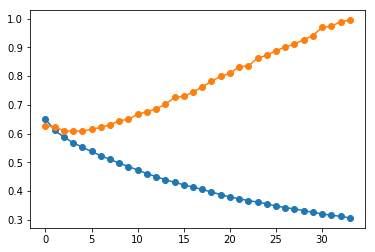

In [65]:
plt.plot([epoch for epoch in range(len(history300_trained.history["loss"]))], history300_trained.history["loss"], "-o")
plt.plot([epoch for epoch in range(len(history300_trained.history["val_loss"]))], history300_trained.history["val_loss"], "-o")

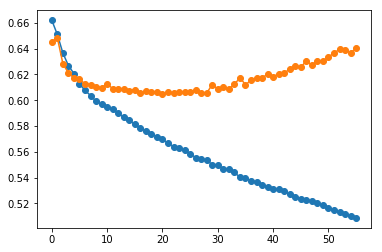

In [66]:
plt.plot([epoch for epoch in range(len(history50_trained.history["loss"]))], history50_trained.history["loss"], "-o")
plt.plot([epoch for epoch in range(len(history50_trained.history["val_loss"]))], history50_trained.history["val_loss"], "-o")

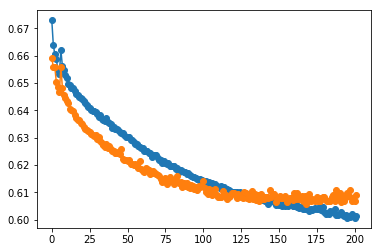

In [67]:
plt.plot([epoch for epoch in range(len(history50_fixed.history["loss"]))], history50_fixed.history["loss"], "-o")
plt.plot([epoch for epoch in range(len(history50_fixed.history["val_loss"]))], history50_fixed.history["val_loss"], "-o")

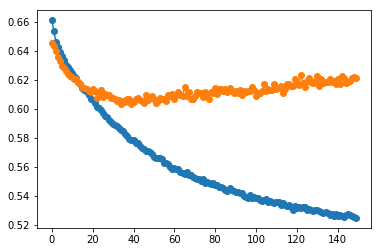

In [68]:
plt.plot([epoch for epoch in range(len(history300_fixed.history["loss"]))], history300_fixed.history["loss"], "-o")
plt.plot([epoch for epoch in range(len(history300_fixed.history["val_loss"]))], history300_fixed.history["val_loss"], "-o")

Start with validation vs training loss.

28073/28073 [==============================] - 10s 344us/step


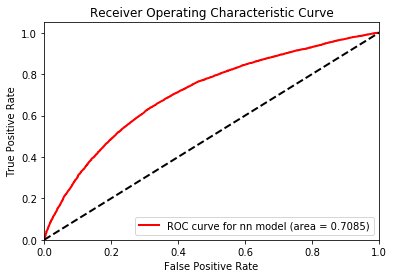

In [51]:
preds = model300_trained.predict(test["seqs"], batch_size=2500, verbose=1)
np.mean((np.squeeze(preds) > 0.5) == test["labels"])
evaluation.roc_plot(np.expand_dims(test["labels"],1),
                    [preds],
                    ["nn"],
                    'reports/figures/nn.svg')

0.65863997435258081

28073/28073 [==============================] - 9s 315us/step


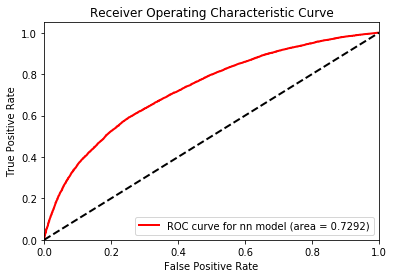

In [49]:
preds = model50_fixed.predict(test["seqs"], batch_size=2500, verbose=1)
np.mean((np.squeeze(preds) > 0.5) == test["labels"])
evaluation.roc_plot(np.expand_dims(test["labels"],1),
                    [preds],
                    ["nn"],
                    'reports/figures/nn.svg')

28073/28073 [==============================] - 10s 342us/step


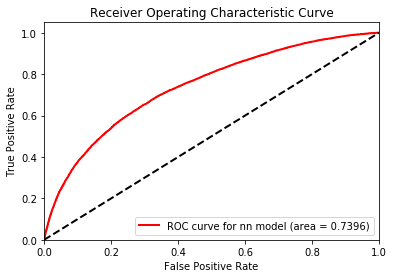

In [50]:
preds = model300_fixed.predict(test["seqs"], batch_size=2500, verbose=1)
np.mean((np.squeeze(preds) > 0.5) == test["labels"])
evaluation.roc_plot(np.expand_dims(test["labels"],1),
                    [preds],
                    ["nn"],
                    'reports/figures/nn.svg')

In [29]:
from src import evaluation

28073/28073 [==============================] - 20s 719us/step


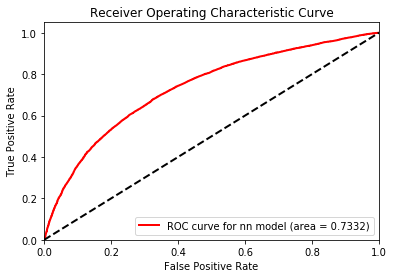

In [52]:
preds = model50_trained.predict(test["seqs"], batch_size=2500, verbose=1)
np.mean((np.squeeze(preds) > 0.5) == test["labels"])
evaluation.roc_plot(np.expand_dims(test["labels"],1),
                    [preds],
                    ["nn"],
                    'reports/figures/nn.svg')

In [45]:
preds.shape

(28073, 1)

In [40]:
test["labels"].shape

(28073,)

In [46]:
np.expand_dims(test["labels"],1).shape

(28073, 1)

In [4]:
old_path = joblib.load("data/interim/nn50_trained_history.pkl")

In [5]:
import pandas as pd
path = pd.DataFrame(old_path)

In [6]:
path

,acc,auc,loss,val_acc,val_auc,val_loss
0,0.647091,0.800953,0.626900,0.659950,0.731000,0.611069
1,0.647928,0.799693,0.626369,0.659461,0.731086,0.610451
2,0.650400,0.798519,0.624321,0.658850,0.730904,0.610084
3,0.647928,0.797446,0.624579,0.660723,0.730779,0.609314
4,0.651325,0.796620,0.622987,0.660357,0.730659,0.608984
5,0.650487,0.795702,0.623544,0.660886,0.730626,0.609510
6,0.650475,0.795262,0.623958,0.660886,0.730572,0.609424
7,0.651458,0.794618,0.622356,0.660275,0.730379,0.609717
8,0.651528,0.794117,0.622757,0.660967,0.730354,0.609451
9,0.651767,0.793511,0.622216,0.660397,0.730186,0.609350
